Реализовать api, которое позволяет: генерировать, преобразовывать и визуализировать последовательность плоских полигонов, представленных в виде картежа картежей (например: ((0,0), (0,1), (1,1), (1,0)) – представление для квадрата). Последовательности представлений полигонов представляют из себя итераторы (далее: последовательности полигонов). Решать задачи с использованием функционального стиля программирования, в том числе активно использовать функции из модуля itertools и functools.

### 1. Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора.

Пример:
- ((0,0), (0,1), (1,1), (1,0)) – представление для квадрата
- ((2,0),(3,1),(4,0)) - представление треугольника
- ((0,2),(1,2),(2,3),(2,5),(1,4)) - представление пятиугольника


(((0,0), (0,1), (1,1), (1,0)), ((2,0),(3,1),(4,0)), ((0,2),(1,2),(2,3),(2,5),(1,4)))

In [1]:
import matplotlib.pyplot as plt # для построения графиков
import numpy as np

def show_polygon(polygons):
    
    # Создаем графический контекст
    fig, ax = plt.subplots()
    
    # Отображаем полигоны
    for i in polygons:
        ax.fill(np.array(i)[:, 0], np.array(i)[:, 1], alpha=0.5) 
        # ax.fill(x, y, color='название_цвета', alpha=прозрачность)
        # np.array(i)[:, 0] представляет собой массив координат x вершин полигона i, 
        # а np.array(i)[:, 1] - массив координат y вершин полигона i
        # метод fill из библиотеки Matplotlib ожидает массивы numpy в качестве аргументов для координат x и y полигонов

    # Настраиваем оси координат
    # добавляем горизонтальную и вертикальную линии через начало координат
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    # устанавливаем положение левой и нижней осей координат в начало координат
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    # скрываем правую и верхнюю оси координат
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    plt.show()

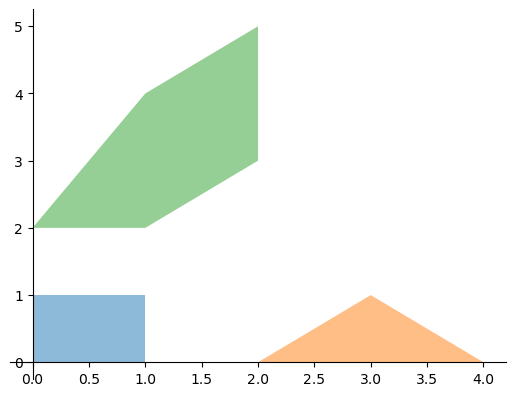

In [2]:
show_polygon([[[0,0], [0,1], [1,1], [1,0]], [[2,0],[3,1],[4,0]], [[0,2],[1,2],[2,3],[2,5],[1,4]]])

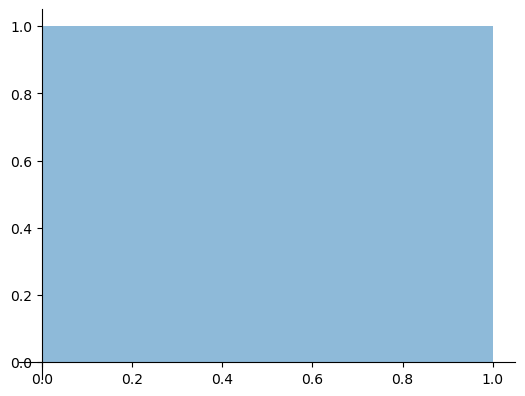

In [3]:
# если передавать в функцию координаты в виде кортежей (в случае с одной фигурой), 
# это будет ошибкой, т.к. при поведение кортежа и списка при привращении их в np.array различаются !!!
# но в случае с несколькими фигурами, не принципиально в каком виде передавать координаты

show_polygon([[[0,0], [0,1], [1,1], [1,0]]]) 

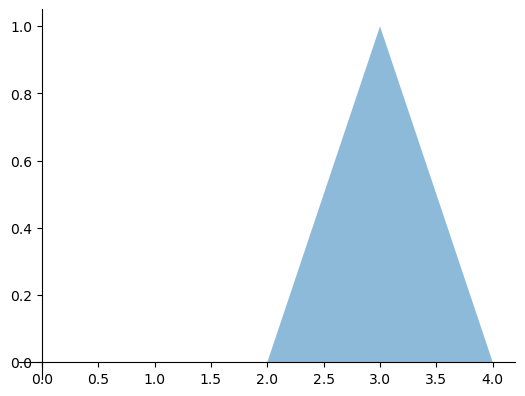

In [4]:
show_polygon([[[2,0], [3,1], [4,0]]])

### 2. Реализовать функции, генерирующие бесконечную последовательность непересекающихся полигонов с различающимися координатами (например, «ленту»):
- прямоугольников ( gen_rectangle() );
- треугольников ( gen_triangle() );
- правильных шестиугольников ( gen_hexagon() ).


In [5]:
import random
import itertools

# Исправление случайного состояния для воспроизводимости
# np.random.seed(873574)

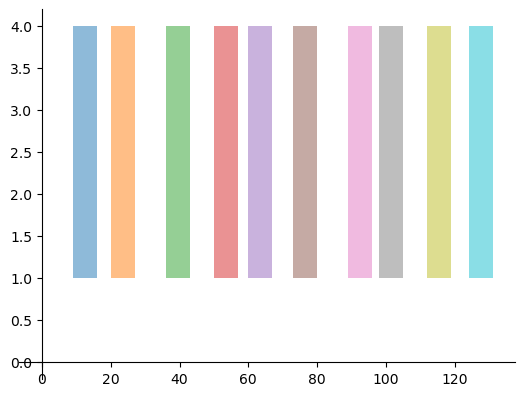

In [6]:
# ((x, y), (x + width, y), (x + width, y + height), (x, y + height)) -> ((0,0), (0,1), (2,1), (2,0))

def gen_rectangle():
    x = random.randint(-10, 10)
    y = random.randint(-10, 10) #  = 0 если мы хотим, чтоб все фигуры располагались на абсциссе
    width = random.randint(1, 10)
    height = random.randint(1, 10)
    
    while True:
        yield [[x, y], [x + width, y], [x + width, y + height], [x, y + height]]
        # yield используется для создания генераторов, которые могут генерировать значения по требованию, 
        # вместо того чтобы сразу вернуть все значения как функция
        #print(((x, y), (x + width, y), (x + width, y + height), (x, y + height)))
        x += width + random.randint(1, 10)
        # y += random.randint(-10, 10) если мы не хотим, чтоб прямоугольники стояли в ряд

# Используем itertools.islice и вышенаписанную функцию show_polygon для вывода первых 5 прямоугольников
show_polygon(itertools.islice(gen_rectangle(), 10))

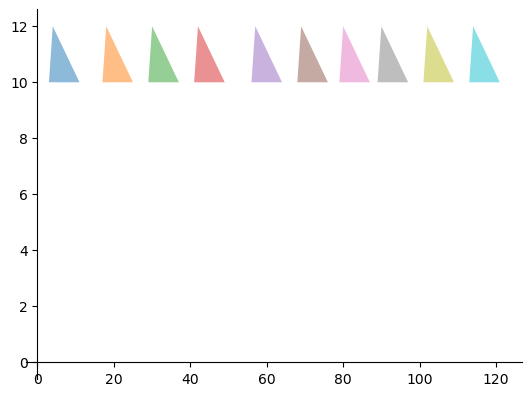

In [7]:
# ((x, y), (x+x1, y+height),(x+x1+x2, y)) -> ((0,0), (1,2), (2,0))

def gen_triangle(): # треугольники
    x = random.randint(0, 10)
    y = random.randint(0, 10) # = y если мы хотим, чтоб все фигуры располагались на абсциссе
    height = random.randint(1, 10)
    x1 = random.randint(1, 10)
    x2 = random.randint(1, 10)
    
    while True:
        yield [[x, y], [x+x1, y+height],[x+x1+x2, y]]
        #print(((x, y), (x+x1, y+height),(x+x1+x2, y)))
        x += x1 + x2 + random.randint(1, 10)
        # y += random.randint(-10, 10) если мы не хотим, чтоб треугольники стояли в ряд

# Используем itertools.islice и вышенаписанную функцию show_polygon для вывода первых 5 треугольников
show_polygon(itertools.islice(gen_triangle(), 10))

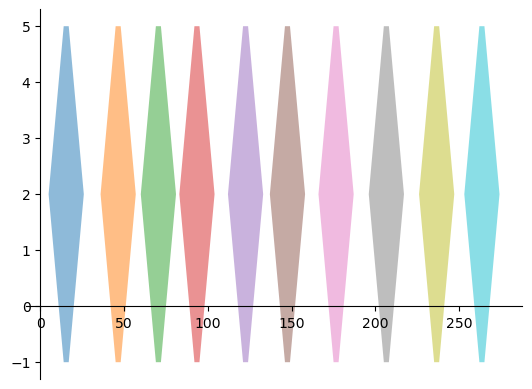

In [8]:
# ((x,y), (x+x1, y+y1), (x+x1+x2, y+y1), (x+x1+x2+x3, y), (x+x1+x2, y-y1), (x+x1, y-y1)) 

def gen_hexagon(): # правильные шестиугольники
    x = random.randint(0, 10)
    y = random.randint(0, 10) 
    y1 = random.randint(1, 10)
    x1 = random.randint(1, 10)
    x2 = random.randint(1, 10)
    
    while True:
        yield [[x,y], [x+x1, y+y1], [x+x1+x2, y+y1], [x+x1+x2+x1, y], [x+x1+x2, y-y1], [x+x1, y-y1]] 
        #print(((x,y), (x+x1, y+y1), (x+x1+x2, y+y1), (x+x1+x2+x1, y), (x+x1+x2, y-y1), (x+x1, y-y1)) )
        x += x1*2 + x2 + random.randint(1, 10)
        # y += random.randint(-10, 10) если мы не хотим, чтоб шестиугольники стояли в ряд

# Используем itertools.islice и вышенаписанную функцию show_polygon для вывода первых 5 шестиугольников
show_polygon(itertools.islice(gen_hexagon(), 10))


С помощью данных функций используя функции из модуля itertools сгенерировать 7 фигур, включающих как прямоугольники, так и треугольники и шестиугольники, визуализировать результат.

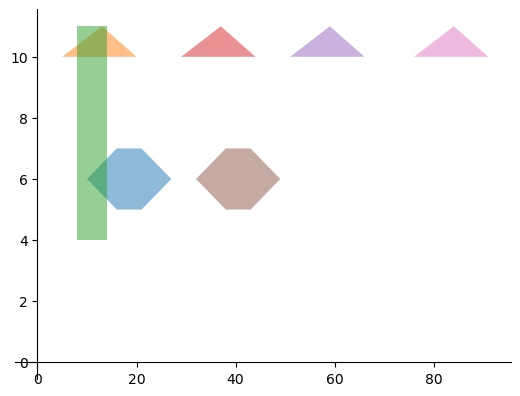

In [9]:
functions = [gen_rectangle(), gen_triangle(), gen_hexagon()]  # набор функций для вызова
polygons = [] # список координат сгенерируемых фигур
for _ in range(7):
    polygon = itertools.islice(random.choice(functions), 1) # генерируем произвольную фигуру
    polygons.append([coords for coords in polygon][0]) # добавляем ее координаты в список polygons
show_polygon(polygons)

# в строке 5 используется срез только первого элемента ([0]), т.к. при обычном вызове генератора 
# [coords for coords in polygon] будет возвращаться последовательность полигонов (координат фигуры)
# обвернутая в ещё один лишний список (см. пример ниже), что в дальнейшем сделает невозможным 
# выполнение show_polygon(polygons)

In [10]:
# Пример объяснение "[0]" на основе шестиугольников
hexagons = itertools.islice(gen_hexagon(), 1)
hexagon_coordinates1 = [coords for coords in hexagons]
hexagon_coordinates2 = hexagon_coordinates1[0]
print(hexagon_coordinates1)
print(hexagon_coordinates2)

[[[7, 2], [10, 8], [11, 8], [14, 2], [11, -4], [10, -4]]]
[[7, 2], [10, 8], [11, 8], [14, 2], [11, -4], [10, -4]]


### 3. Реализовать операции: 
- параллельный перенос ( tr_translate );
- поворот ( tr_rotate );
- симметрия ( tr_symmetry ); 
- гомотетия ( tr_homothety );


которые можно применить к последовательности полигонов с помощью функции map.


In [11]:
# функция для перевода координат из вида кортежей в списки (вдруг пригодится)

def to_list(polygons):
    polygons_list = [[list(coord) for coord in polygon] for polygon in polygons]
    return polygons_list

ПАРАЛЛЕЛЬНЫЙ ПЕРЕНОС

In [12]:
def tr_translate(polygons, distance_x, distance_y): # distance - расстояние, на которое делается параллельный перенос
    def translated_polygon(polygon):
        translated_polygon = []
        for coord in polygon:
            translated_coord = [coord[0] + distance_x, coord[1] + distance_y]
            translated_polygon.append(translated_coord)
        return translated_polygon
    
    return list(map(translated_polygon, polygons))

In [13]:
# проверка работы функции tr_translate для последовательности полигонов
hexagons1 = list(itertools.islice(gen_hexagon(), 3))
print('Изначальные координаты: ', hexagons1)
print('Координаты с параллельным переносом: ', tr_translate(hexagons1, 10, 0))

Изначальные координаты:  [[[2, 7], [4, 10], [11, 10], [13, 7], [11, 4], [4, 4]], [[18, 7], [20, 10], [27, 10], [29, 7], [27, 4], [20, 4]], [[31, 7], [33, 10], [40, 10], [42, 7], [40, 4], [33, 4]]]
Координаты с параллельным переносом:  [[[12, 7], [14, 10], [21, 10], [23, 7], [21, 4], [14, 4]], [[28, 7], [30, 10], [37, 10], [39, 7], [37, 4], [30, 4]], [[41, 7], [43, 10], [50, 10], [52, 7], [50, 4], [43, 4]]]


In [14]:
#проверка работы функции tr_translate для одного полигона
hexagons2 = list(itertools.islice(gen_hexagon(), 1))
print('Изначальные координаты: ', hexagons2)
print('Координаты с параллельным переносом: ', tr_translate(hexagons2, 10, 0))

Изначальные координаты:  [[[2, 4], [9, 8], [16, 8], [23, 4], [16, 0], [9, 0]]]
Координаты с параллельным переносом:  [[[12, 4], [19, 8], [26, 8], [33, 4], [26, 0], [19, 0]]]


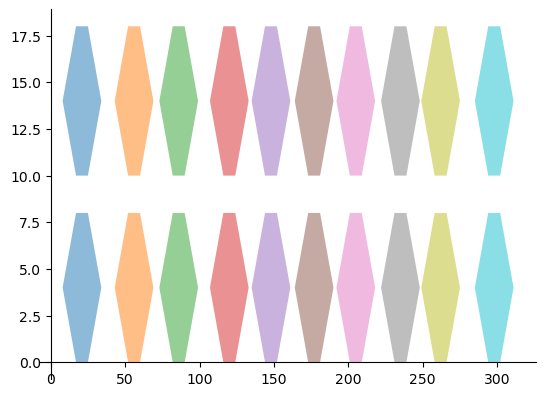

In [15]:
hexagons3 = list(itertools.islice(gen_hexagon(), 10))
hexagons4 = tr_translate(hexagons3, 0, 10)
hexagons5 = hexagons3 + hexagons4
show_polygon(hexagons5)

ПОВОРОТ

In [16]:
import math # для работы с углом

def tr_rotate(polygons, angle): # angle - угол поворота
    # вычисляем координаты центра первой фигуры, вокруг которого мы будем поворачивать всю цепочку фигур
    center_chain_x = sum(v[0] for v in polygons[0]) / len(polygons[0])
    center_chain_y = sum(v[1] for v in polygons[0]) / len(polygons[0])   
    
    def rotated_polygon(polygon):
        rotated_polygon = []    
        for coord in polygon:
            x = coord[0] - center_chain_x
            y = coord[1] - center_chain_y
            new_x = x * math.cos(math.radians(angle)) - y * math.sin(math.radians(angle))
            new_y = x * math.sin(math.radians(angle)) + y * math.cos(math.radians(angle))
            rotated_polygon.append([new_x + center_chain_x, new_y + center_chain_y])
        return rotated_polygon

    return list(map(rotated_polygon, polygons)) 

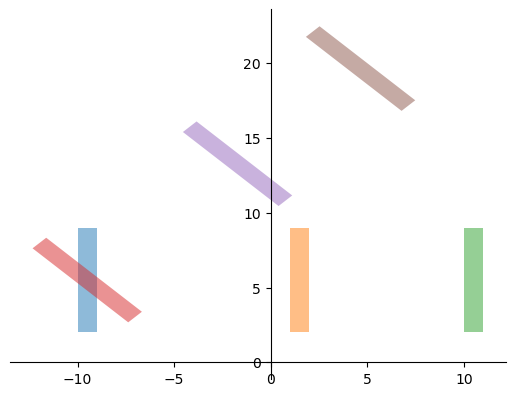

In [17]:
rectangle1 = list(itertools.islice(gen_rectangle(), 3))
rectangle2 = tr_rotate(rectangle1, 45)
rectangle3 = rectangle1 + rectangle2
show_polygon(rectangle3)

СИММЕТРИЯ

In [18]:
def tr_symmetry(polygons, asymptote_x=None, asymptote_y=None): # asymptote - ось симметрии 
    def symmetric_polygon(polygon):
        symmetric_polygon = []
        for coord in polygon:
            if asymptote_x != None and asymptote_y != None:
                symmetric_polygon.append([asymptote_x+(asymptote_x-coord[0]),asymptote_y+(asymptote_y-coord[1])])
            elif asymptote_x != None:
                symmetric_polygon.append([asymptote_x + (asymptote_x - coord[0]), coord[1]])
            elif asymptote_y != None:
                symmetric_polygon.append([coord[0], asymptote_y + (asymptote_y - coord[1])]) 
        return symmetric_polygon

    return list(map(symmetric_polygon, polygons))

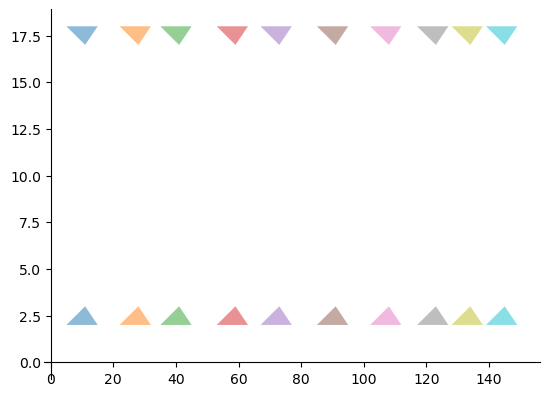

In [19]:
triangle1 = list(itertools.islice(gen_triangle(), 10))
triangle2 = tr_symmetry(triangle1, asymptote_y=10)
triangle3 = triangle1 + triangle2
show_polygon(triangle3)

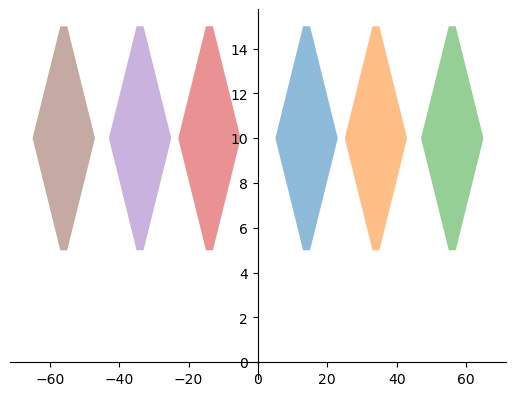

In [20]:
hexagons6 = list(itertools.islice(gen_hexagon(), 3))
hexagons7 = tr_symmetry(hexagons6, asymptote_x=0)
hexagons8 = hexagons6 + hexagons7
show_polygon(hexagons8)

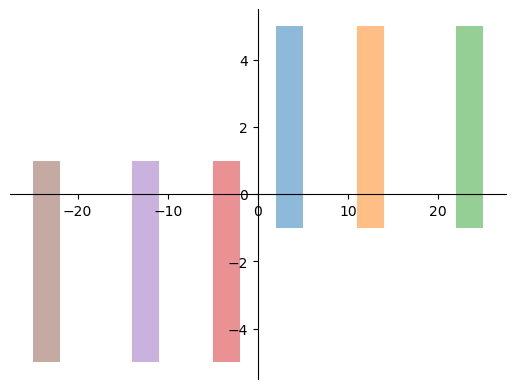

In [21]:
rectangle7 = list(itertools.islice(gen_rectangle(), 3))
rectangle8 = tr_symmetry(rectangle7, asymptote_x=0, asymptote_y=0)
rectangle9 = rectangle7 + rectangle8
show_polygon(rectangle9)

ГОМОТЕТИЯ

In [22]:
# центр гомотетии - начало координат 
def tr_homothety(polygons, k): # k - коэффициент масштабирования
    homothetic_polygons = [] 
    for i in range(len(polygons)):
        
        homothetic_polygon = []
        for coord in polygons[i]:
            homothetic_polygon.append([coord[0]*(k**i), coord[1]*(k**i)])
            
        homothetic_polygons.append(homothetic_polygon)
    return homothetic_polygons

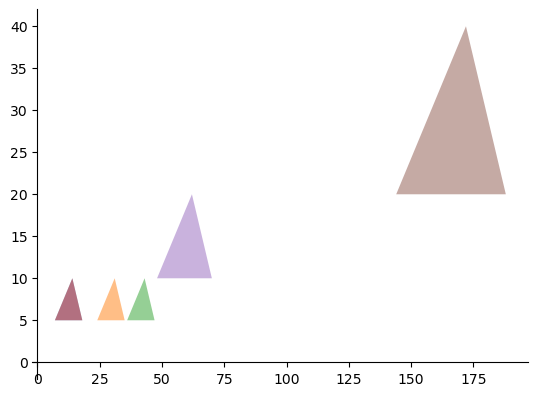

In [23]:
triangle4 = list(itertools.islice(gen_triangle(), 3))
triangle5 = tr_homothety(triangle4, 2)
triangle6 = triangle4 + triangle5
show_polygon(triangle6)

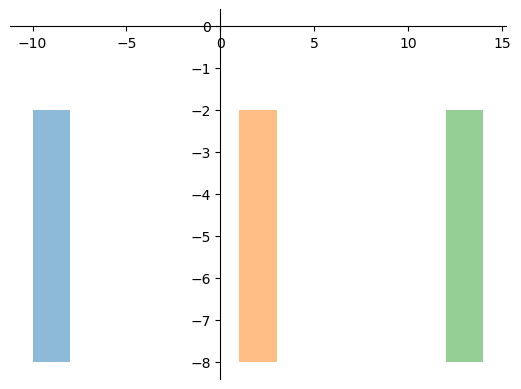

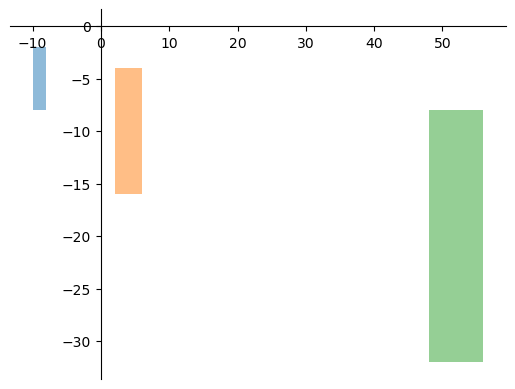

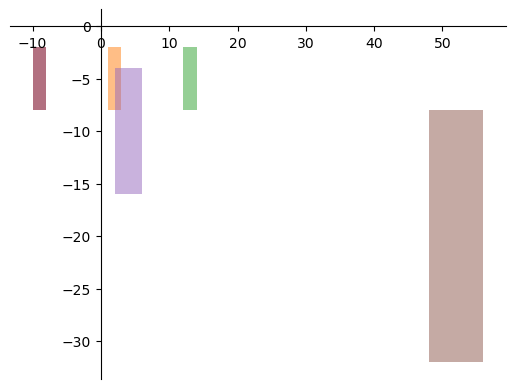

In [24]:
rectangle4 = list(itertools.islice(gen_rectangle(), 3))
rectangle5 = tr_homothety(rectangle4, 2)
rectangle6 = rectangle4 + rectangle5
show_polygon(rectangle4)
show_polygon(rectangle5)
show_polygon(rectangle6)

### 4. С помощью данных функций создать и визуализировать:

- 3 параллельных «ленты» из последовательностей полигонов, расположенных под острым углом к оси x

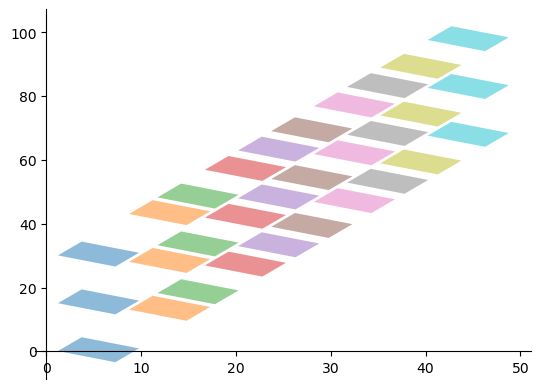

In [25]:
chain1_1 = list(itertools.islice(gen_rectangle(), 10))
chain1_2 = tr_rotate(chain1_1, 60)
chain1_3 = tr_translate(chain1_2, 0, 15)
chain1_4 = tr_translate(chain1_3, 0, 15)
chain1_5 = chain1_2 + chain1_3 + chain1_4
show_polygon(chain1_5)

- две пересекающихся «ленты» из последовательностей полигонов, пересекающихся не в начале координат

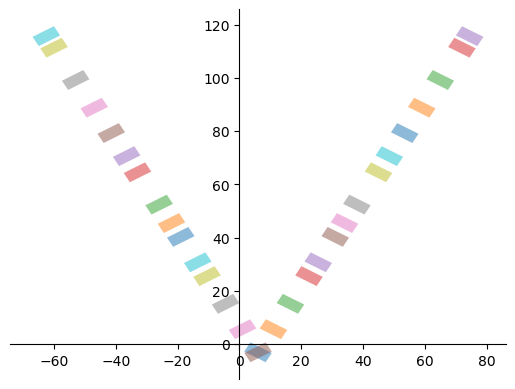

In [26]:
chain2_1 = list(itertools.islice(gen_rectangle(), 15))
chain2_2 = tr_rotate(chain2_1, 60)
chain2_3 = tr_rotate(chain2_1, 120)
chain2_4 = chain2_2 + chain2_3
show_polygon(chain2_4)

- две параллельных ленты треугольников, ориентированных симметрично друг к другу

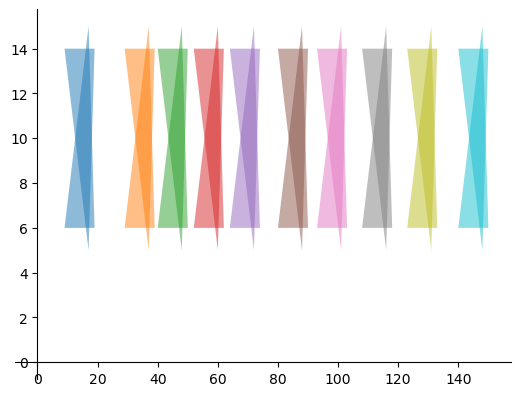

In [27]:
chain3_1 = list(itertools.islice(gen_triangle(), 10))
chain3_2 = tr_symmetry(chain3_1, asymptote_y=10)
chain3_3 = chain3_1 + chain3_2
show_polygon(chain3_3)

- последовательность четырехугольников в разном масштабе, ограниченных двумя прямыми, пересекающимися в начале координат

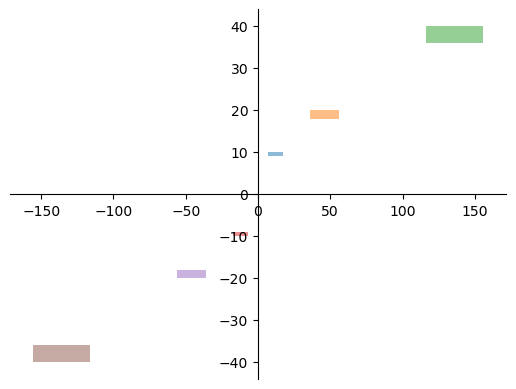

In [28]:
chain4_1 = list(itertools.islice(gen_rectangle(), 3))
chain4_2 = tr_homothety(chain4_1, 2)
chain4_3 = tr_symmetry(chain4_2, asymptote_x=0, asymptote_y=0)
chain4_4 = chain4_2 + chain4_3
show_polygon(chain4_4)

### 5. Реализовать операции
(обязательная часть: 2 пункта, 4 пункта – сложность 1; 6 пунктов – сложность 2)


которые можно применить к последовательности полигонов с помощью функции filter:

- фильтрации фигур, являющихся выпуклыми многоугольниками ( flt_convex_polygon )


"Метод углов":

1. Для каждой вершины многоугольника вычисляем угол, образованный этой вершиной, предыдущей вершиной и следующей вершиной.

2. Проверяем, что все вычисленные углы меньше 180 градусов. Если это условие выполняется для всех вершин, то многоугольник является выпуклым.


In [29]:
def flt_convex_polygon(polygon):
    def get_angle(v1, v2, v3): # функция для вычисления углов при вершинах 
        
        # math.atan2(y, x): возвращает арктангенс от y/x в радианах, учитывая знак обоих аргументов 
        #    для определения квадранта точки (x, y) на плоскости
        # math.degrees(x): преобразует угол x из радиан в градусы
        #    Вычисляем углы между векторами v3-v2 и v1-v2 с помощью math.atan2(), 
        # вычитаем их друг из друга, чтобы получить угол между этими векторами. 
        # Затем этот угол преобразуется из радиан в градусы с помощью math.degrees().
        angle = math.degrees(math.atan2(v3[1] - v2[1], v3[0] - v2[0]) - math.atan2(v1[1] - v2[1], v1[0] - v2[0]))
        
        #возвращает значение angle + 360, если значение angle меньше нуля, иначе возвращает просто значение angle
        return angle + 360 if angle < 0 else angle 

    angles = []
    for i in range(len(polygon)):
        angle = get_angle(polygon[i-1], polygon[i], polygon[(i+1) % len(polygon)])
        # polygon[(i+1) % len(polygon) удобная конструкция, позволяющая избегать исключения IndexError
        angles.append(angle)

    return all(angle < 180 for angle in angles)

In [30]:
1%4, 2%4, 3%4, 4%4

(1, 2, 3, 0)

In [31]:
polygons = [[(2, 2), (2, 5), (3, 6), (4, 4)], [(5, 4), (6, 6), (8, 5), (6, 4), (7, 2)]]
convex_polygons = list(filter(flt_convex_polygon, polygons))

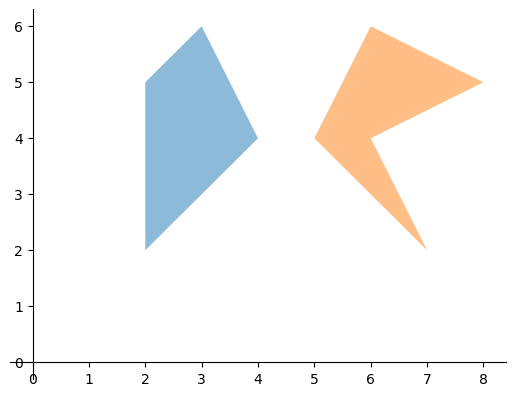

In [32]:
show_polygon(polygons)

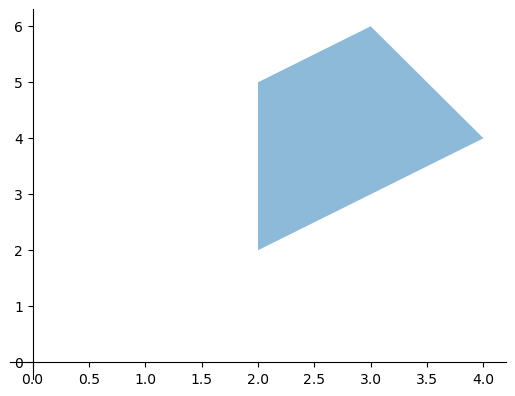

In [33]:
show_polygon(convex_polygons)

- фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой ( flt_angle_point )

In [34]:
import functools

In [35]:
def flt_angle_point(polygon, point):
    for i in range(len(polygon)):
        # Проверяем, не является ли данная точка одной из вершин многоугольника
        if polygon[i] == point:
            return True
        
    for i in range(len(polygon)):
        angle_vertex = np.array(polygon[i]) 
        next_vertex = np.array(polygon[(i+1) % len(polygon)])
        point_to_check = np.array(point)
        
        vertex_vertex = next_vertex - angle_vertex
        vertex_point = point_to_check - angle_vertex

        # Проверяем, что точка лежит на прямой, соединяющей две соседние вершины многоугольника
        if np.isclose(np.cross(vertex_vertex, vertex_point), 0):
            # Проверяем, что точка находится между этими вершинами
            if np.dot(vertex_vertex, vertex_point) > 0:
                # np.dot вычисляет скалярное произведение векторов
                return True
    return False

np.cross() вычисляет векторное произведение двух векторов.

    Аргументы функции np.cross():
    1. a: Первый вектор или массив векторов.
    2. b: Второй вектор или массив векторов.
    3. axisa: Опциональный параметр, указывающий ось в массиве a, вдоль которой берется векторное произведение.
    4. axisb: Опциональный параметр, указывающий ось в массиве b, вдоль которой берется векторное произведение.
    5. axisc: Опциональный параметр, указывающий ось, вдоль которой расположены векторы результирующего массива.
    
    
np.isclose() используется для проверки, находятся ли значения двух массивов или скалярных величин в пределах допустимого отклонения по заданной точности. Она возвращает массив булевых значений, указывающих, выполнены ли условия близости между значениями или нет.

    Аргументы функции np.isclose():
    1. a, b: Массивы с числами или скалярные значения, которые нужно сравнивать.
    2. atol: Допустимая абсолютная погрешность. По умолчанию равно 1e-8.
    3. rtol: Допустимая относительная погрешность. По умолчанию равно 1e-5.
    4. equal_nan: Параметр, указывающий нужно ли считать NaN как равные друг другу. По умолчанию False.

In [36]:
polygons = [[(2, 2), (2, 5), (3, 6), (4, 4)], [(5, 4), (6, 6), (8, 5), (6, 4), (7, 2)]]
angle_point_polygons = list(filter(functools.partial(flt_angle_point, point=(1,1)), polygons))
angle_point_polygons

[[(2, 2), (2, 5), (3, 6), (4, 4)]]

- фильтрации фигур, имеющих площадь менее заданной ( flt_square )

In [37]:
# функция для расчета площади многоугольника
def calculate_polygon_area(polygon):
    n = len(polygon) # количество вершин многоугольника
    area = 0.0
    for i in range(n):
        j = (i + 1) % n
        area += polygon[i][0] * polygon[j][1]
        area -= polygon[j][0] * polygon[i][1]
    area = abs(area) / 2.0
    return area

In [38]:
polygons = [[(5,4), (6,6), (8,5), (6,4), (7,2)], [(2,2), (2,5), (3,6), (4,4)], [(2,2), (2,5), (3,6), (4,4)]]
areas = list(map(calculate_polygon_area, polygons))
areas

[4.0, 4.5, 4.5]

In [39]:
# функция для проверки площадей многоугольников 
def flt_square(polygon, square):
    area = calculate_polygon_area(polygon)
    return area >= square

In [40]:
square_polygons = list(filter(functools.partial(flt_square, square=4.5), polygons))
square_polygons

[[(2, 2), (2, 5), (3, 6), (4, 4)], [(2, 2), (2, 5), (3, 6), (4, 4)]]

- фильтрации фигур, имеющих кратчайшую сторону менее заданного значения ( flt_short_side )

In [41]:
def shortest_side_length_(polygon):
    side_length = []
    for i in range(len(polygon)):
        coord1 = polygon[i]
        coord2 = polygon[(i+1) % len(polygon)]
        side_length.append(((coord2[0]-coord1[0])**2 + (coord2[1]-coord1[1])**2)**1/2)
    return min(side_length)
shortest_side_length_([[1,1], [1,4], [2,4], [3,2]]), shortest_side_length_([[1,1], [1,4], [3,2]])

(0.5, 2.5)

In [42]:
def flt_short_side(polygon, value):
    def shortest_side_length(polygon): # функция для подсчета длины минимальной стороны многоугольника
        side_length = []
        for i in range(len(polygon)):
            coord1 = polygon[i]
            coord2 = polygon[(i+1) % len(polygon)]
            side_length.append(((coord2[0]-coord1[0])**2 + (coord2[1]-coord1[1])**2)**1/2)
        return min(side_length)

    if shortest_side_length(polygon) < value:
        return False
    return True

In [43]:
polygons = [[[1,1], [1,4], [2,4], [3,2]], [[1,1], [1,4], [3,2]]]
flt_short_side_polygon = list(filter(functools.partial(flt_short_side, value=1), polygons))
flt_short_side_polygon

[[[1, 1], [1, 4], [3, 2]]]

- фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) ( flt_point_inside )

In [44]:
def flt_point_inside(polygon, point):
    def is_point_inside_polygon(polygon, point): # функция для определения, включает ли многоуг. заданную точку 
        x, y = point
        n = len(polygon)
        inside = False
        p1x, p1y = polygon[0]
        for i in range(1, n + 1):
            p2x, p2y = polygon[i % n]
            if y > min(p1y, p2y):
                if y <= max(p1y, p2y):
                    if x <= max(p1x, p2x):
                        if p1y != p2y:
                            xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                            if p1x == p2x or x <= xinters:
                                inside = not inside
            p1x, p1y = p2x, p2y
        return inside
    
    if flt_convex_polygon(polygon) and is_point_inside_polygon(polygon, point):
        return True
    return False

In [45]:
polygons = [[(1, 1), (1, 3), (3, 3), (3, 1)], [(1, 1), (1, 3), (3, 3), (2, 2.5)]]
flt_point_inside_polygon = list(filter(functools.partial(flt_point_inside, point=(2, 2)), polygons))

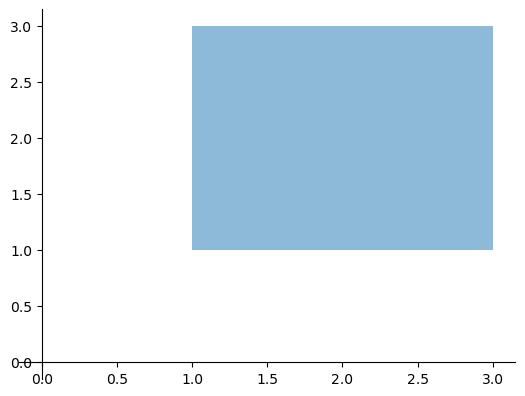

In [46]:
show_polygon([[(1, 1), (1, 3), (3, 3), (3, 1)]])

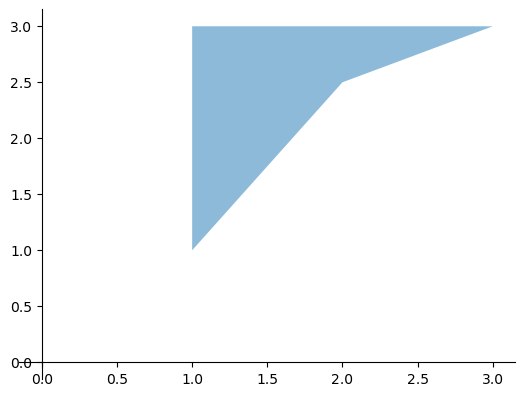

In [47]:
show_polygon([[(1, 1), (1, 3), (3, 3), (2, 2.5)]])

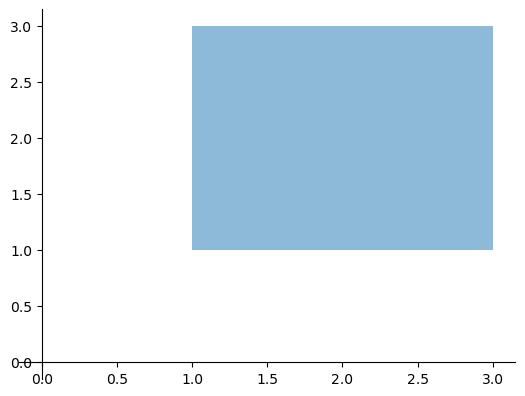

In [48]:
show_polygon(flt_point_inside_polygon)

- фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника ( flt_polygon_angles_inside )


In [49]:
def flt_polygon_angles_inside(polygon, angle):
    def get_angle(v1, v2, v3): # функция для вычисления углов при вершинах 
        angle = math.degrees(math.atan2(v3[1] - v2[1], v3[0] - v2[0]) - math.atan2(v1[1] - v2[1], v1[0] - v2[0]))
        return angle + 360 if angle < 0 else angle 

    angles = []
    for i in range(len(polygon)):
        angl = get_angle(polygon[i-1], polygon[i], polygon[(i+1) % len(polygon)])
        angles.append(angl)
    
    if angle in angles and flt_convex_polygon(polygon):
        return True
    return False

In [50]:
polygons = [[(1, 1), (1, 3), (3, 3), (3, 1)], [(1, 1), (2, 3), (3, 1)], [(1, 1), (2, 3), (3, 1)]]
flt_polygon_angles_inside_polygon = list(filter(functools.partial(flt_polygon_angles_inside, angle=90), polygons))
flt_polygon_angles_inside_polygon

[[(1, 1), (1, 3), (3, 3), (3, 1)]]

### 6. 
С помощью данных функций реализовать и визуализировать:

(обязательная часть: 1 пункт, 3 пункта – сложность 1)

- фильтрацию фигур, созданных в рамках пункта 4.4; подобрать параметры так, чтобы на выходе было получено 6 фигур;

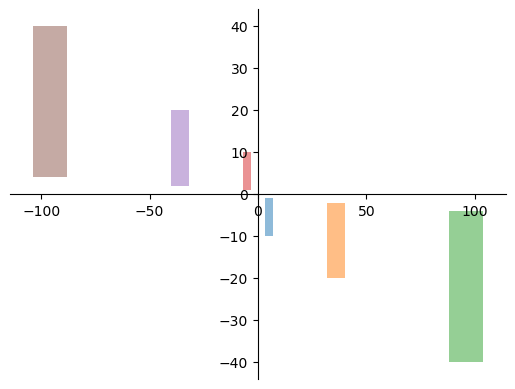

In [51]:
chain6_1 = list(itertools.islice(gen_rectangle(), 3))
chain6_2 = tr_homothety(chain6_1, 2)
chain6_3 = tr_symmetry(chain6_2, asymptote_x=0, asymptote_y=0)
chain6_4 = chain6_2 + chain6_3
show_polygon(chain6_4)

- используя функции генерации из п. 2 и операции из п. 3 создать не менее 15 фигур, которые имеют различный масштаб и выбрать из них (подбором параметра фильтрации) не более 4х фигур, имеющих кратчайшую сторону менее заданного значения;

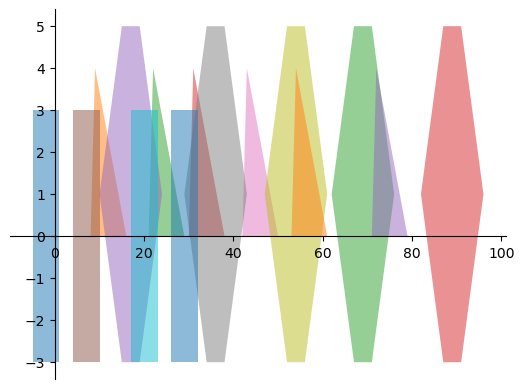

In [52]:
functions = [gen_rectangle(), gen_triangle(), gen_hexagon()]  
polygons = [] 
for _ in range(15):
    polygon = itertools.islice(random.choice(functions), 1) 
    polygons.append([coords for coords in polygon][0]) 
show_polygon(polygons)

In [53]:
def flt_side(polygon, value):
    def shortest_side_length(polygon): # функция для подсчета длины минимальной стороны многоугольника
        side_length = []
        for i in range(len(polygon)):
            coord1 = polygon[i]
            coord2 = polygon[(i+1) % len(polygon)]
            side_length.append(((coord2[0]-coord1[0])**2 + (coord2[1]-coord1[1])**2)**1/2)
        return min(side_length)

    if shortest_side_length(polygon) < value:
        return True
    return False

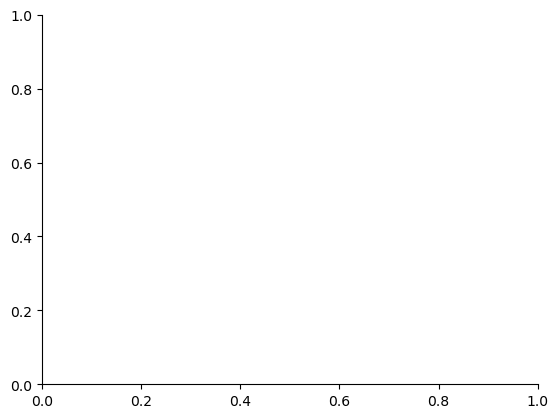

In [54]:
flt_side_polygon = list(filter(functools.partial(flt_side, value=7), polygons))
show_polygon(flt_side_polygon)

- используя функции генерации из п. 2 и операции из п. 3 создать не менее 15 фигур имеющих множество пересечений и обеспечить фильтрацию пересекающихся фигур.

In [55]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [56]:
from shapely.geometry import Polygon, MultiPolygon

def check_polygons_intersection(two_polygons):
    # Преобразуем список точек в объекты Polygon
    shapely_polygons = [Polygon(poly) for poly in two_polygons]
    
    # Проверяем пересечение всех полигонов
    for i in range(len(shapely_polygons)):
        for j in range(i + 1, len(shapely_polygons)):
            if shapely_polygons[i].intersects(shapely_polygons[j]):
                return True
    
    return False

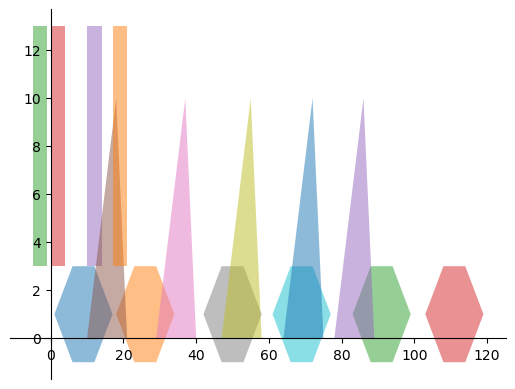

In [57]:
functions = [gen_rectangle(), gen_triangle(), gen_hexagon()]  
polygons = [] 
for _ in range(15):
    polygon = itertools.islice(random.choice(functions), 1) 
    polygons.append([coords for coords in polygon][0]) 
show_polygon(polygons)

In [58]:
def flt_intersection(polygons):
    flt_polygons = polygons
    pair_of_polygons = itertools.combinations(flt_polygons, 2)
    polygons_intersection = []
    for pair in pair_of_polygons:
        if check_polygons_intersection(pair):
            if pair[0] not in polygons_intersection:
                polygons_intersection.append(pair[0])
            if pair[1] not in polygons_intersection:
                polygons_intersection.append(pair[1])
                
    for i in polygons_intersection:
        if i in flt_polygons:
            flt_polygons.remove(i)
    return flt_polygons

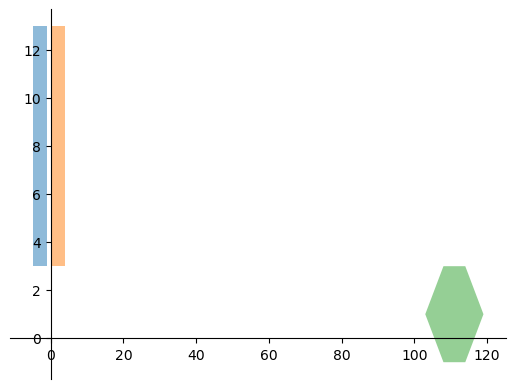

In [59]:
flt_polygons = flt_intersection(polygons)
show_polygon(flt_polygons)